# Lab 2: Clustering

The goal of this lab session is to code a clustering algorithm, apply it to data and compare the performance with other techniques.

You have to send the filled notebook named **"L2_familyname1_familyname2.ipynb"** (groups of 2) by email to aml.centralesupelec.2019@gmail.com by October 9, 2019. Please put **"AML-L2"** in the subject. 

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster # all clustering techniques except hdbscan
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We will have two toy datasets to try the different methods:

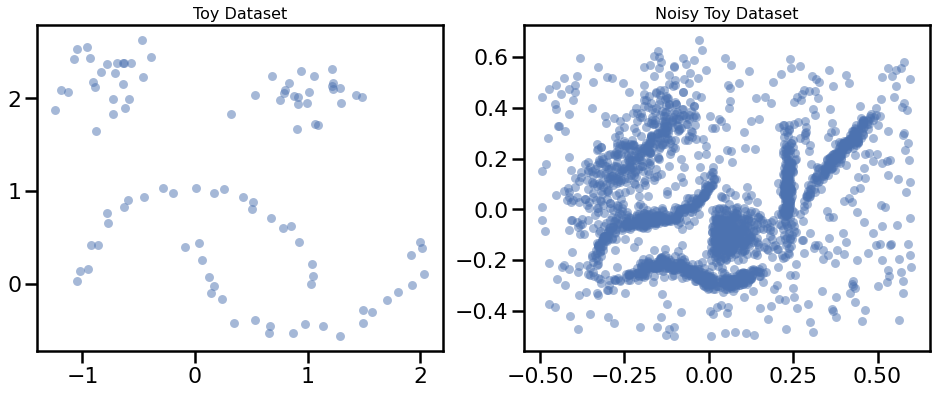

In [3]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

# test_data_1 = np.load('clusterable_data.npy')
test_data_1 = np.load("drive/My Drive/Colab Notebooks/clusterable_data.npy")

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', **plot_kwds)
ax[1].set_title('Noisy Toy Dataset', size=16)

plt.show();

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


There are a lot of clustering algorithms to choose from the `sklearn` library. So what clustering algorithms should you be using? It depends.

## K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

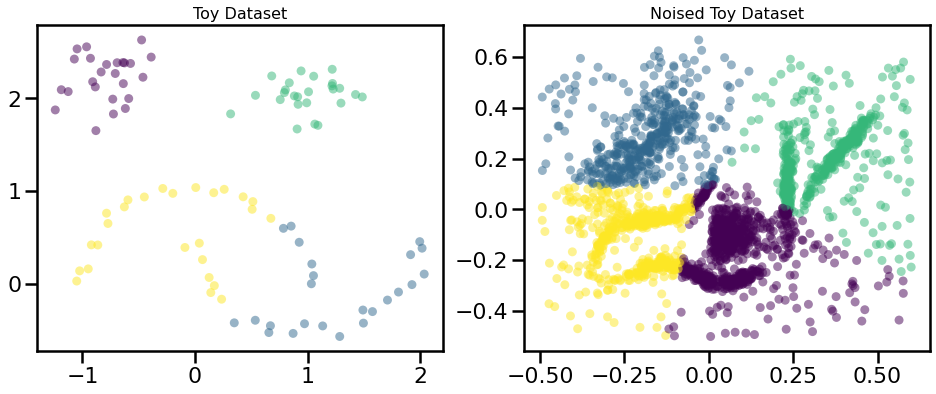

In [5]:
from sklearn.cluster import KMeans
kmeans_0 = KMeans(n_clusters=4, max_iter=200).fit(test_data_0)
kmeans_1 = KMeans(n_clusters=4, max_iter=200).fit(test_data_1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0.labels_ , **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)


plt.show();

## Aglomerative Single Linkage clustering

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.

**Code your own Aglomerative Single Linkage clustering algorithm**!:

- Fill in the class 
- During the process, keep track of the cluster merges by saving a (num_samples-1,4) np.array being a linkage matrix in scypy format (to use their function to plot dendrogram: `scipy.cluster.hierarchy.dendrogram`). check documentation.

In [6]:
class my_SingleLinkageAglomerativeClustering():
    
    def __init__(self, metric="euclidean", n_clusters=3):
        '''
        Attributes:
        
        metric_: {"euclidean","precomputed"}
            the distance to be used
            if precomputed then X is distance matrix
        n_clusters: integer
            number of clusters to return 
        linkage_matrix_: (n-1, 4) np.array
            in the same format as linkage  
        labels_: integer np.array
            label assigment
        hierarchy_: list of np.array
            each array corresponds to label assigment
            at each level (number of clusters)
            hierarchy_[0]=np.array(list(range(n)))
        '''
        self.metric_ = metric
        self.n_clusters_ = n_clusters
        self.linkage_matrix_ = None
        self.labels_ = None
        self.hierarchy_ = None
        
    def fit(self, X):
        """ Create a hierarchy of clusters
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        self: my_SingleLinkageAglomerativeClustering
            to have access to labels_
        """
        # if it's not precomputed compute the distance matrix
        # using from scipy.spatial import distance 
        
        n = X.shape[0]
        D = distance.squareform(distance.pdist(X, metric=self.metric_))
        D_new = np.copy(D)
        for p in range(len(D)): D_new[p, p] = np.nan
            
        # HINT:
        # You can use a minimum spanning tree and add merge in increasing order
        # or modifying the distance matrix 
        # (add row/column for new clusters and remove/put zero in old row/colums)
        
        # keep track of merges in linkage_matrix_ and labels in hierarchy_
        
        # update labels_ from the hierarchy level selected by n_clusters_ 
        self.hierarchy_ = [np.arange(X.shape[0])]
        n_clusters_current = len(np.unique(self.hierarchy_))
        self.linkage_matrix_ = []
        c = 0
        while (c < n-1):
#             print(n_clusters_current)

            i,j = np.unravel_index(np.nanargmin(D_new), D.shape)
            
            previous_hierarchy = np.copy(self.hierarchy_[-1])
            nb_points_new_cluster = len(previous_hierarchy[np.logical_or(previous_hierarchy==previous_hierarchy[i], 
                                                                         previous_hierarchy==previous_hierarchy[j])])
            self.linkage_matrix_.append([previous_hierarchy[i], previous_hierarchy[j], D_new[i,j], nb_points_new_cluster])
                       
            new_hierarchy = np.copy(previous_hierarchy)
            new_label = n + c
            
            new_hierarchy[new_hierarchy==new_hierarchy[i]] = new_label
            new_hierarchy[new_hierarchy==new_hierarchy[j]] = new_label
            
            self.hierarchy_.append(new_hierarchy) 
            
            current_clusters_labels = np.unique(new_hierarchy)
            n_clusters_current = len(current_clusters_labels)
            
            for cluster_label in current_clusters_labels:
                cluster = np.where(new_hierarchy==cluster_label)[0]
                if cluster_label == new_label: 
                    for i_new_cluster in cluster:
                        for j_new_cluster in cluster:
                            D_new[i_new_cluster, j_new_cluster] = np.nan
                            D_new[j_new_cluster, i_new_cluster] = np.nan
                else:
                    new_cluster = np.where(new_hierarchy==new_label)[0]
                    new_distance = np.nanmin([D[k, l] for k in new_cluster for l in cluster])
                    for i_new_cluster in new_cluster:
                        for j_other_cluster in cluster:
                            D_new[i_new_cluster, j_other_cluster] = new_distance
                            D_new[j_other_cluster, i_new_cluster] = new_distance
                            
            c+= 1
                
        self.linkage_matrix_ = np.array(self.linkage_matrix_)
 
    def plot_dendrogram(self):
        '''Use self.linkage_matrix_ in `scipy.cluster.hierarchy.dendrogram` 
        to plot the dendrogram of the hierarchical structure
        '''        
        fig = plt.figure(figsize=(25, 10))
        dn = dendrogram(self.linkage_matrix_)

Apply the method to our toy datasets

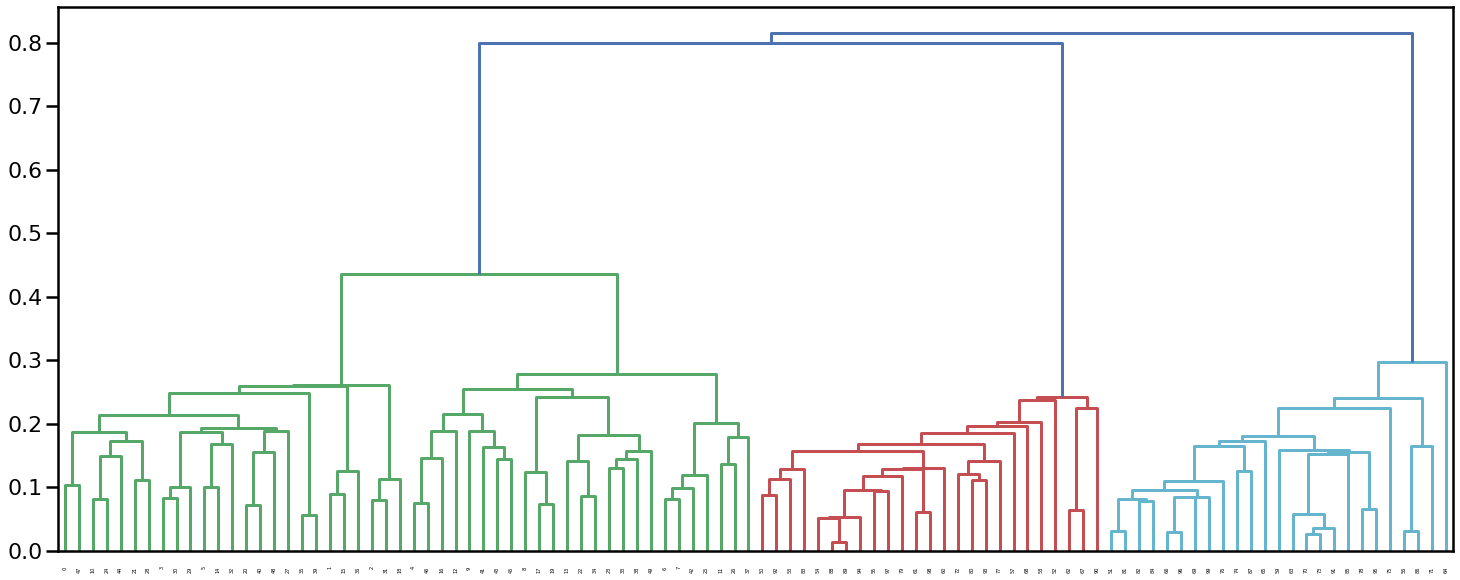

In [7]:
from scipy.spatial import distance 
from scipy.cluster.hierarchy import dendrogram

n_clusters_ = 4 
model_0 = my_SingleLinkageAglomerativeClustering(n_clusters=n_clusters_)
model_0.fit(test_data_0)
model_0.plot_dendrogram()

In [8]:
# model_1 = my_SingleLinkageAglomerativeClustering(n_clusters=n_clusters_).fit(test_data_1)

We didn't run the clustering on the noised toy dataset because our implementation of hierarchical clustering is not efficient enough to support the large number of elements in this dataset.

Text(0.5, 1.0, 'Toy Dataset')

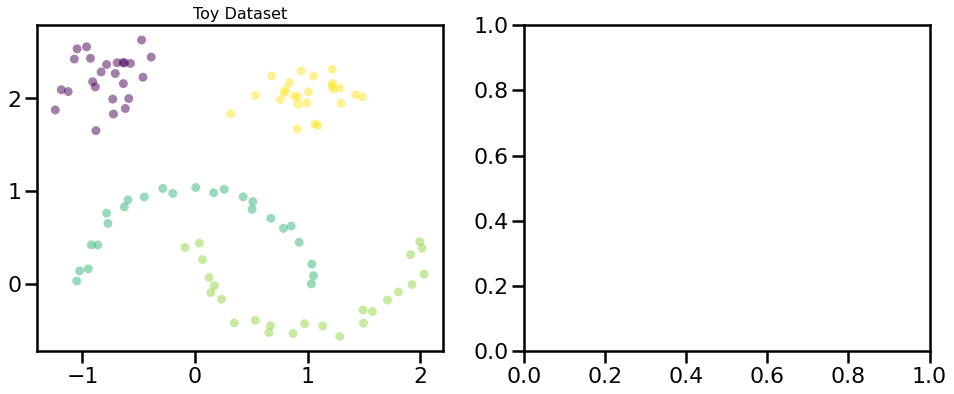

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=model_0.hierarchy_[-n_clusters_], **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

# ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=model_1.hierarchy_[-n_clusters_], **plot_kwds)
# ax[1].set_title('Noised Toy Dataset', size=16)

Try the different linkage methods implemented in `sklearn`  and comment

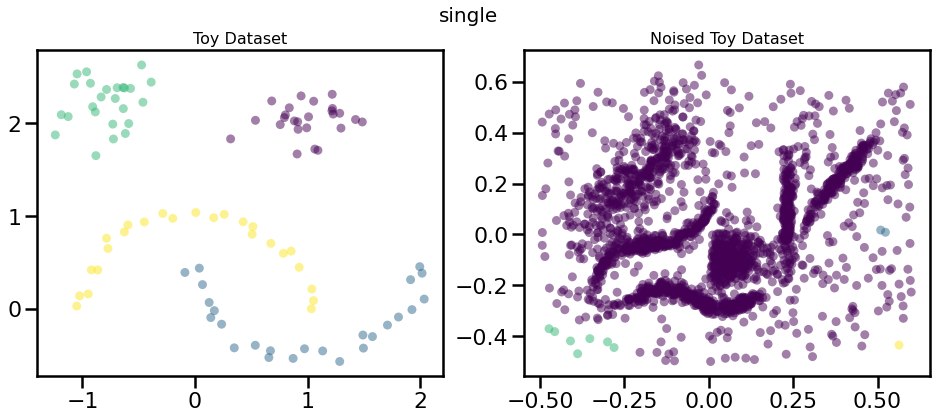

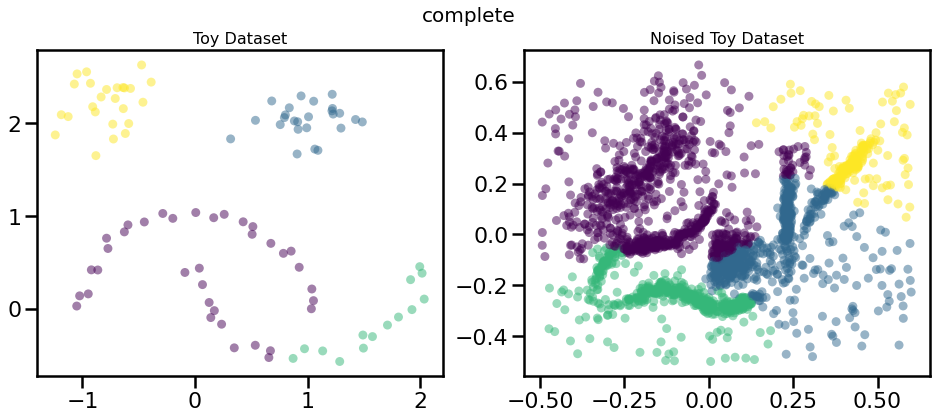

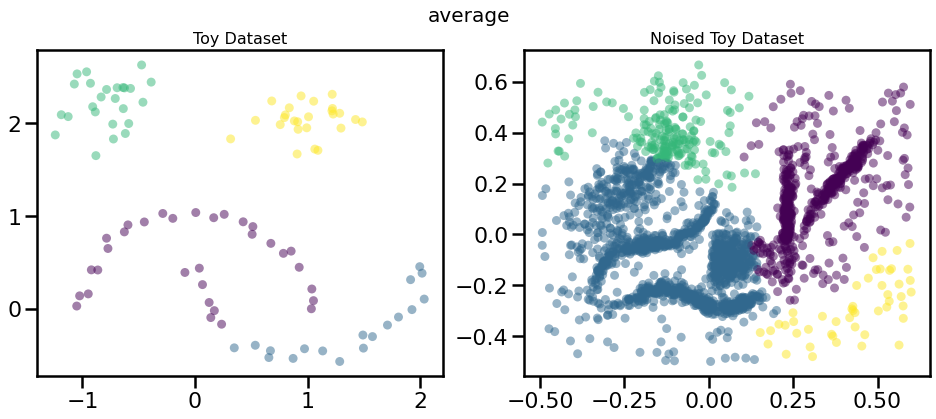

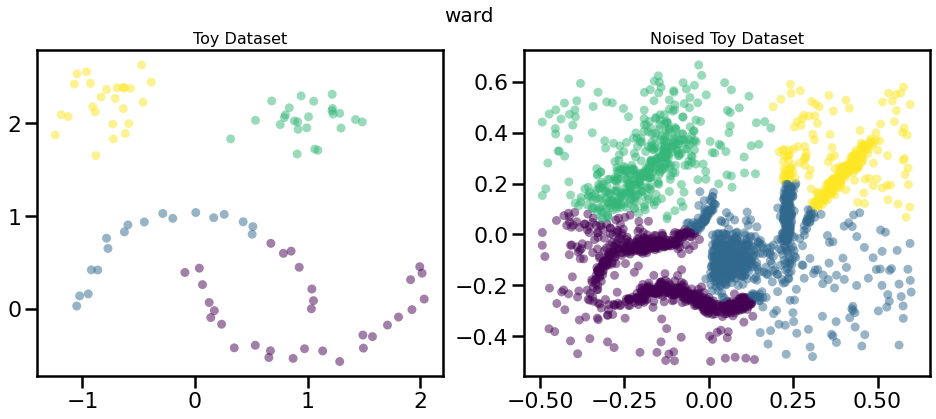

In [10]:
from sklearn.cluster import AgglomerativeClustering
for linkage_ in ["single", "complete",  "average", "ward"]:
    hierarchical_1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage=linkage_).fit(test_data_0)
    hierarchical_2 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage=linkage_).fit(test_data_1)
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=hierarchical_1.labels_, **plot_kwds)
    ax[0].set_title('Toy Dataset', size=16)
    ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=hierarchical_2.labels_, **plot_kwds)
    ax[1].set_title('Noised Toy Dataset', size=16)
    fig.suptitle(linkage_, size=20)

#### Comment: 
The single linkage perform better that the other linkage methods on the clean toy dataset. However, we see that it fails to capture the structure of the data on the noisy dataset, as it is sensitive to noise. The other methods, especially max and ward linkage, seem to give better results on this noisy dataset.Since that the sum of squares starts out at zero (because every point is in its own cluster) and then grows as we merge clusters, ward’s method keeps this growth as small as possible, especially between each big cluster (that mainly contain meaningful data) and small cluster (that mainly contain noise). This leads to the formation of clusters of similar size, where each cluster contain meaningful and noise data, because we rarely link two big clusters.

## DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

Apply it to the test_data, how do you tune the parameters?

Number of clusters in Toy Dataset: 4
Number of clusters in Noised Toy Dataset: 27
Percentage of outliers in Toy Dataset: 0.0 %
Percentage of outliers in Noised Toy Dataset: 16.93 %


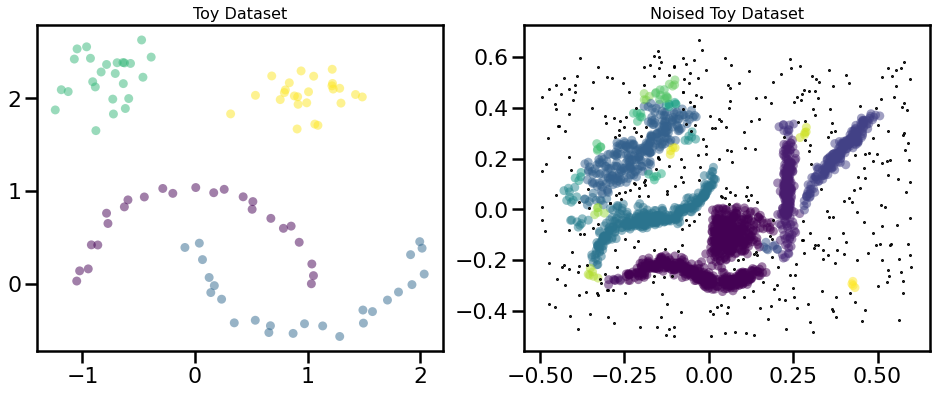

In [11]:
from sklearn.cluster import DBSCAN
dbscan_0 = DBSCAN(eps=0.35, min_samples=4).fit(test_data_0)
dbscan_1 = DBSCAN(eps=0.02, min_samples=4).fit(test_data_1)
index_inliers_0 = np.where(dbscan_0.labels_>-1)[0]
index_inliers_1 = np.where(dbscan_1.labels_>-1)[0]
index_outliers_0 = np.where(dbscan_0.labels_==-1)[0]
index_outliers_1 = np.where(dbscan_1.labels_==-1)[0]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0][index_inliers_0], test_data_0.T[1][index_inliers_0], c=dbscan_0.labels_[index_inliers_0], **plot_kwds)
ax[0].scatter(test_data_0.T[0][index_outliers_0], test_data_0.T[1][index_outliers_0], c='black', s=1)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0][index_inliers_1], test_data_1.T[1][index_inliers_1], c=dbscan_1.labels_[index_inliers_1], **plot_kwds)
ax[1].scatter(test_data_1.T[0][index_outliers_1], test_data_1.T[1][index_outliers_1], c='black', s=1)
ax[1].set_title('Noised Toy Dataset', size=16)

print(f"Number of clusters in Toy Dataset: {len(np.unique(dbscan_0.labels_[index_inliers_0]))}")
print(f"Number of clusters in Noised Toy Dataset: {len(np.unique(dbscan_1.labels_[index_inliers_1]))}")

print(f"Percentage of outliers in Toy Dataset: {np.round(100 * len(index_outliers_0)/len(dbscan_0.labels_), 2)} %" )
print(f"Percentage of outliers in Noised Toy Dataset: {np.round(100 * len(index_outliers_1)/len(dbscan_1.labels_), 2)} %")

#### Parameters tuning:
We choose $minPts = 4$ because this value is commonly used.
For the epsilon parameter, we determine the 4th nearest neighbor (4th because of minPts) distance for each point then we plot these distances after sorting them and we choose the value corresponding to the maximum curvature (see below). For the toy dataset, we choose $\epsilon = 0.35$ and for the noised toy dataset, we choose $\epsilon = 0.02$.
#### Comments on the results:
For the toy dataset, we succeed to separate the data into 4 clusters without having any outlier.
For the noised toy dataset, we obtain better results that the previous hierarchical clustering results by capturing around 27 meaningful clusters and around 17% of outliers.

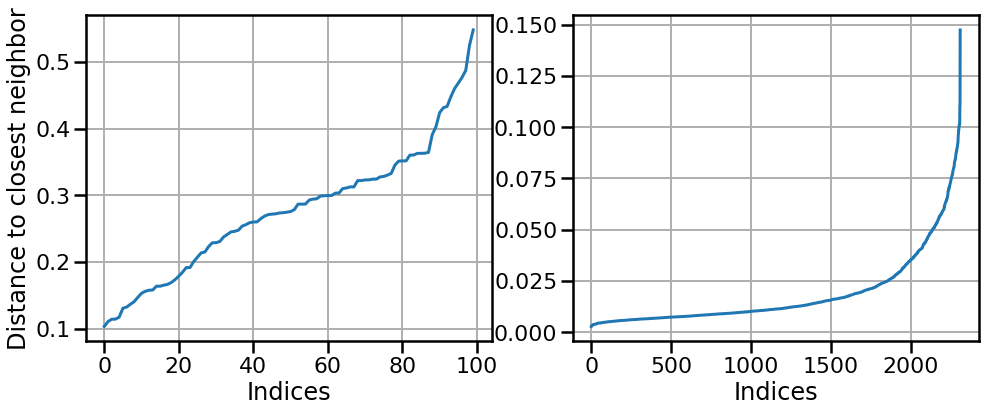

In [12]:
from sklearn.neighbors import NearestNeighbors

neigh_0 = NearestNeighbors(n_neighbors=5).fit(test_data_0)
distances_0, indices_0 = neigh_0.kneighbors(test_data_0)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(np.sort(distances_0[:, -1]))
#ax[0].xline()
ax[0].set_xlabel('Indices')
ax[0].set_ylabel('Distance to closest neighbor')
ax[0].grid()

neigh_1 = NearestNeighbors(n_neighbors=5).fit(test_data_1)
distances_1, indices_1 = neigh_1.kneighbors(test_data_1)

ax[1].plot(np.sort(distances_1[:, -1]))
ax[1].set_xlabel('Indices')
ax[1].grid()

## HDBSCAN

HDBSCAN is a recent algorithm developed by some of the same people who write the original DBSCAN paper. Their goal was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points 'falling out of a cluster'. This results in a smaller tree with fewer clusters that 'lose points'. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability.

In [13]:
!pip install hdbscan

Number of clusters in Toy Dataset: 4
Number of clusters in Noised Toy Dataset: 21
Percentage of outliers in Toy Dataset: 0.0 %
Percentage of outliers in Noised Toy Dataset: 14.68 %


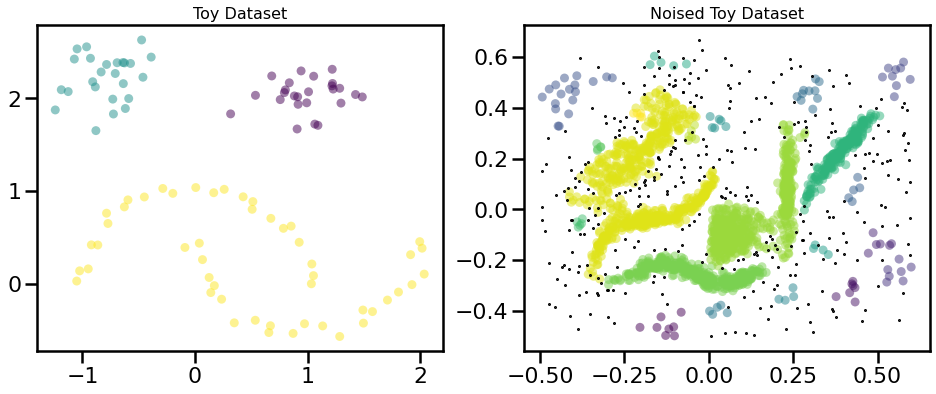

In [14]:
import hdbscan

hdbscan_0 = hdbscan.HDBSCAN( min_cluster_size=4,cluster_selection_epsilon=0.4).fit(test_data_0)
hdbscan_1 = hdbscan.HDBSCAN(min_cluster_size=4,cluster_selection_epsilon=0.025).fit(test_data_1)
index_inliers_0 = np.where(hdbscan_0.labels_>-1)[0]
index_inliers_1 = np.where(hdbscan_1.labels_>-1)[0]
index_outliers_0 = np.where(hdbscan_0.labels_==-1)[0]
index_outliers_1 = np.where(hdbscan_1.labels_==-1)[0]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0][index_inliers_0], test_data_0.T[1][index_inliers_0], c=hdbscan_0.labels_[index_inliers_0], **plot_kwds)
ax[0].scatter(test_data_0.T[0][index_outliers_0], test_data_0.T[1][index_outliers_0], c='black', s=1)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0][index_inliers_1], test_data_1.T[1][index_inliers_1], c=hdbscan_1.labels_[index_inliers_1], **plot_kwds)
ax[1].scatter(test_data_1.T[0][index_outliers_1], test_data_1.T[1][index_outliers_1], c='black', s=1)
ax[1].set_title('Noised Toy Dataset', size=16)

print(f"Number of clusters in Toy Dataset: {len(np.unique(dbscan_0.labels_[index_inliers_0]))}")
print(f"Number of clusters in Noised Toy Dataset: {len(np.unique(hdbscan_1.labels_[index_inliers_1]))}")

print(f"Percentage of outliers in Toy Dataset: {np.round(100 * len(index_outliers_0)/len(hdbscan_0.labels_), 2)} %" )
print(f"Percentage of outliers in Noised Toy Dataset: {np.round(100 * len(index_outliers_1)/len(hdbscan_1.labels_),2)} %")

# TODO

##### **HyperParameter $\epsilon$ optimisation**

Text(0.5, 0, 'number of observations')

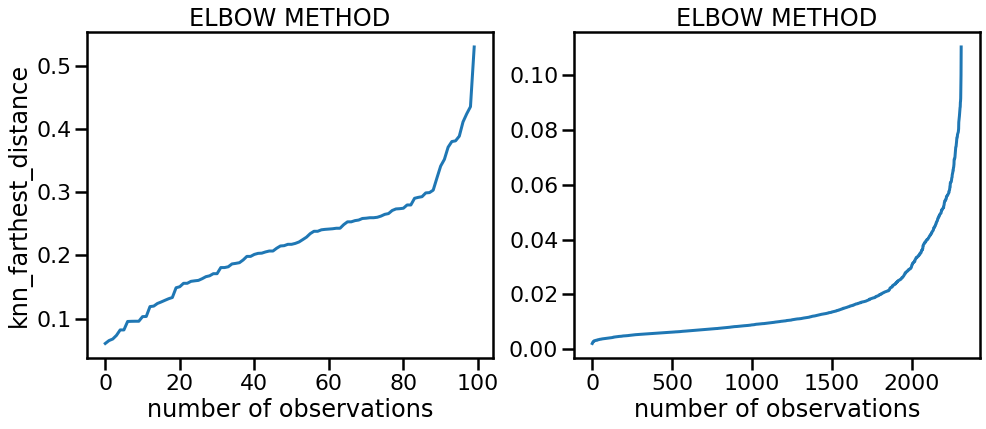

In [15]:
from sklearn.preprocessing import StandardScaler
# hdbscan_data_scaler_0 = StandardScaler().fit(test_data_0)
# hdbscan_data_0 = hdbscan_data_scaler_0.transform(test_data_0)
# hdbscan_data_scaler_1 = StandardScaler().fit(test_data_1)
# hdbscan_data_1 = hdbscan_data_scaler_1.transform(test_data_1)

k0=test_data_0.shape[1]*2
k1=test_data_1.shape[1]*2

ngb_0 = NearestNeighbors(n_neighbors=k0).fit(test_data_0)
distances_0, indices_0 = ngb_0.kneighbors(test_data_0)
ngb_1 = NearestNeighbors(n_neighbors=k1).fit(test_data_1)
distances_1, indices_1 = ngb_1.kneighbors(test_data_1)


fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(np.sort(distances_0[:,-1]))       
ax[0].set_title("ELBOW METHOD")
ax[0].set_xlabel("number of observations")
ax[0].set_ylabel("knn_farthest_distance")

ax[1].plot(np.sort(distances_1[:,-1]))  
ax[1].set_title("ELBOW METHOD")
ax[1].set_xlabel("number of observations")
       

##### **Influence of minimum spanning tree algorithms on the quality of the clustering** 



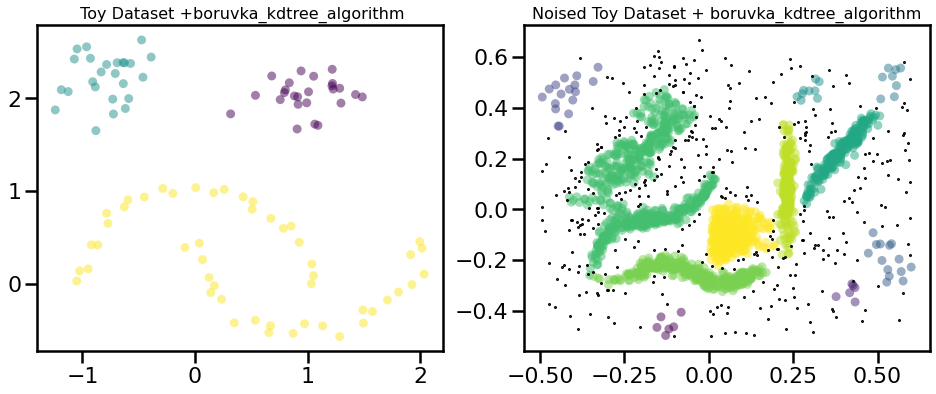

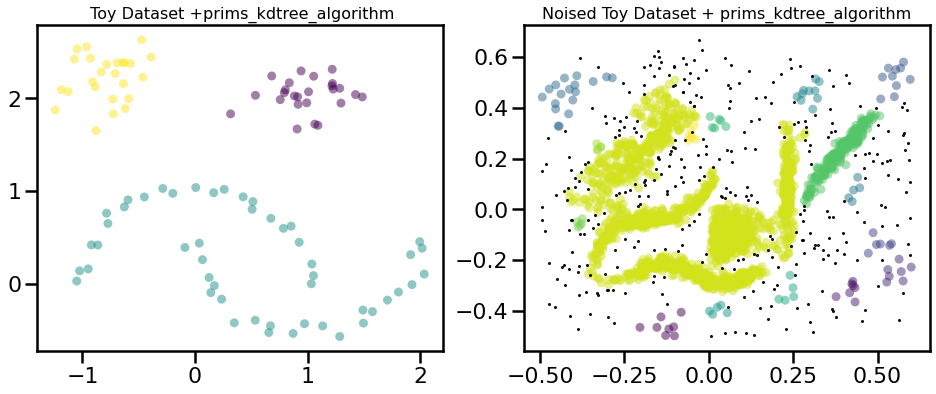

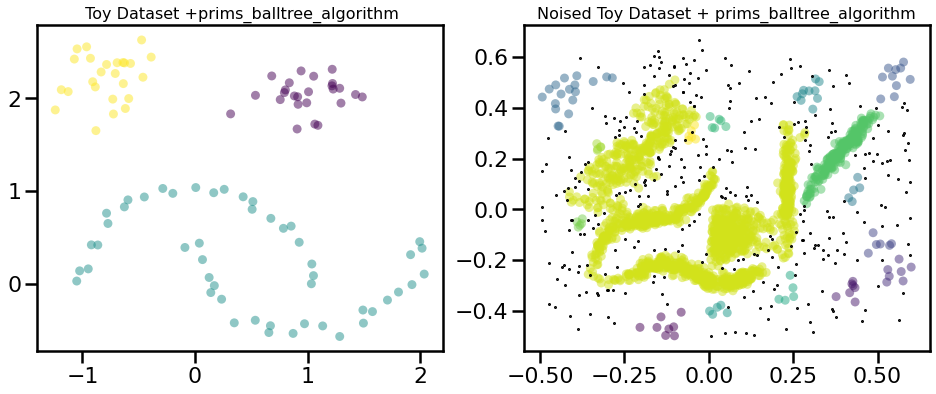

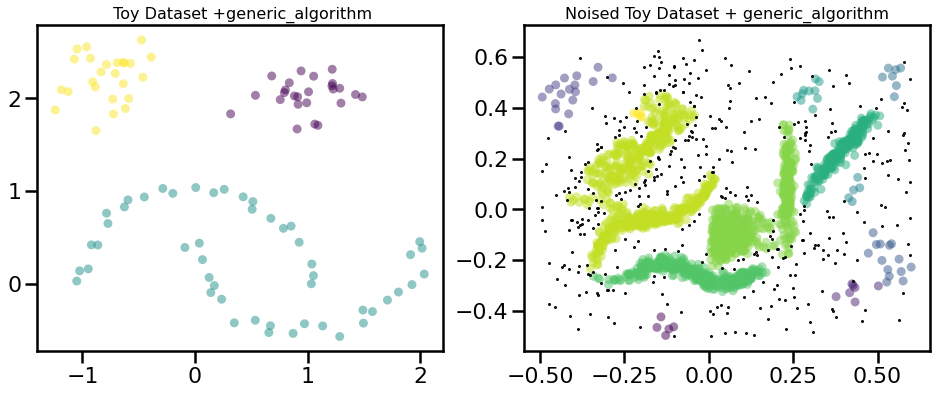

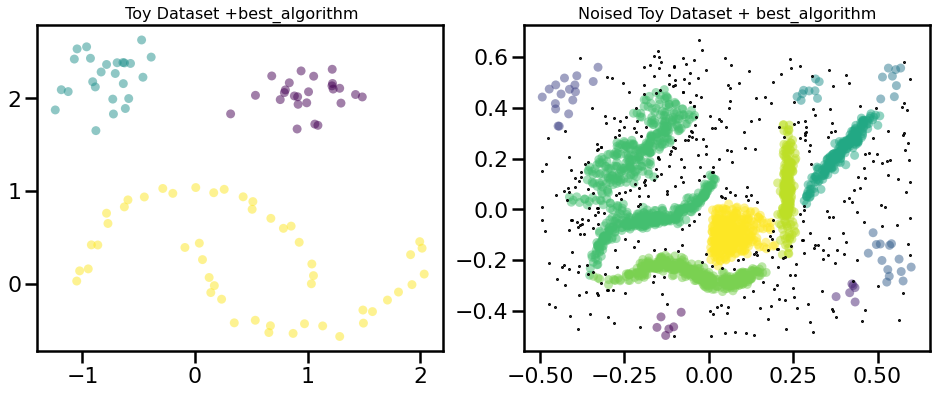

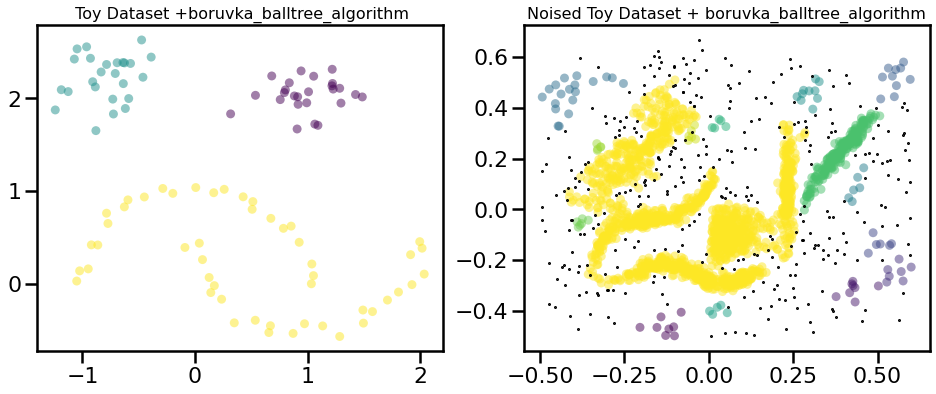

In [16]:
algorithm=['boruvka_kdtree', 'prims_kdtree','prims_balltree','generic','best','boruvka_balltree']
for element in algorithm:
    fig, ax = plt.subplots(1,2,figsize=(16,6))
    hdbscan_a = hdbscan.HDBSCAN(algorithm=element,cluster_selection_epsilon=0.02).fit(test_data_0)
    hdbscan_b = hdbscan.HDBSCAN(algorithm=element,cluster_selection_epsilon=0.026).fit(test_data_1)
    index_inliers_a = np.where(hdbscan_a.labels_>-1)[0]
    index_outliers_a = np.where(hdbscan_a.labels_==-1)[0]
    index_inliers_b = np.where(hdbscan_b.labels_>-1)[0]
    index_outliers_b = np.where(hdbscan_b.labels_==-1)[0]
    ax[0].scatter(test_data_0.T[0][index_inliers_a], test_data_0.T[1][index_inliers_a], c=hdbscan_a.labels_[index_inliers_a], **plot_kwds)
    ax[0].scatter(test_data_1.T[0][index_outliers_a], test_data_0.T[1][index_outliers_a], c='black', s=1)
    ax[0].set_title(f' Toy Dataset +{element}_algorithm', size=16)
    
    ax[1].scatter(test_data_1.T[0][index_inliers_b], test_data_1.T[1][index_inliers_b], c=hdbscan_b.labels_[index_inliers_b], **plot_kwds)
    ax[1].scatter(test_data_1.T[0][index_outliers_b], test_data_1.T[1][index_outliers_b], c='black', s=1)
    ax[1].set_title(f'Noised Toy Dataset + {element}_algorithm', size=16)
    


##### **Comments on the results**
From the above observation one can notice that hdbscan algorithm clusters well the data in a the case of prims or boruvka_balltree algoritms that in others. The "best minimum spanning tree" which is supposed to produce the best clustering failed to group well the Toydataset. When it comes to the noise dataset, boruvka_kdtree seems to give a reasonable good clustering results. 

In the end we can  the choice of an optimal algorithm only depends only on the structure of our data. There is no optimal algorithm that operates well on all data all the time. 

## Apply the algorithms to the following images and comment the results

### NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


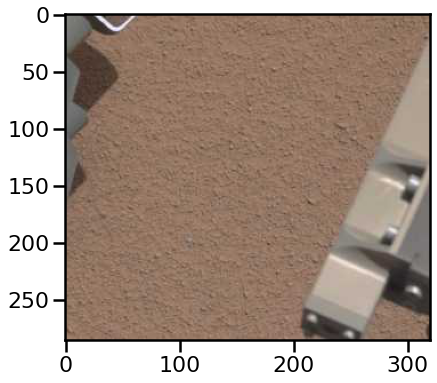

In [17]:
from PIL import Image
Im_1 = Image.open("drive/My Drive/Colab Notebooks/im_nasa_reduced.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(Im_1)
plt.show()

- Transform the image to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.

$$I=\frac{R+G+B}{3}$$
$$S=1-I\times min(R, G, B)$$

In [18]:
X_rgb = np.array(Im_1)
I = (X_rgb[:, :, 0] + X_rgb[:, :, 1] + X_rgb[:, :, 2]) / 3
S = np.ones((X_rgb.shape[0], X_rgb.shape[1])) - np.multiply(I, np.minimum(X_rgb[:, :, 0], X_rgb[:, :, 1], X_rgb[:, :, 2]))
X_is = np.stack((I, S), axis = 2)

- Apply the seen algorithms to segment the image in the Intensity-Saturation representation, comment the results and check if you find something on mars' surface. Be careful with hdbscan and memory errors for some parameters choice (use algorithm='boruvka_kdtree').

In [19]:
import random

def generate_colors(n):
    """ Generates n well-distinguished colors in rgb format
        
        Parameters:
        -----------
        n: number of colors
        
        Returns:
        -----
        rgb_values: list of n colors in rgb format
        
    """
    rgb_values = [] 
    random.seed(30)
    r = int(random.random() * 256) 
    g = int(random.random() * 256) 
    b = int(random.random() * 256) 
    step = 256 / n 
    for _ in range(n): 
        r += step 
        g += step 
        b += step 
        r = int(r) % 256 
        g = int(g) % 256 
        b = int(b) % 256
        rgb_values.append(np.array([r, g, b]))       
    return rgb_values

def plot_clustered_image(image, clustering_labels, title=None):
    """ Plots the result of a clustering on an image by setting for each cluster an arbitrary color.
        
        Parameters:
        -----------
        image: 3d array representing the image in RGB color space
        clustering_labels: 1d array giving the labels of the pixels (of a flatten version of the image)
        title: title of the image
        
    """
    
    clusters = np.unique(clustering_labels)
    colors = generate_colors(len(clusters))
    clusters_colors = {}
    for idx, label in enumerate(clusters):
        clusters_colors[label] = colors[idx]
        
    labels = np.reshape(clustering_labels, (image.shape[0], image.shape[1]))
    Y = np.zeros(image.shape)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = clusters_colors[labels[i, j]]
            
    fig = plt.figure(figsize=(8, 6))
    plt.imshow(Image.fromarray(Y.astype('uint8'), 'RGB'))
    plt.title(title)
    plt.show()


def plot_clustered_image_bis(image, clustering_labels, title=None):
    """ Plots the result of a clustering on an image by averaging on the pixels of the same label in the RGB color space
        
        Parameters:
        -----------
        image: 3d array representing the image in RGB color space
        clustering_labels: 1d array giving the labels of the pixels (of a flatten version of the image)
        title: title of the image
        
    """
    clusters = np.unique(clustering_labels)
    labels = np.reshape(clustering_labels, (image.shape[0], image.shape[1]))
    clusters_colors = {c : np.mean(image[np.where(labels==c)], axis=0) for c in clusters}
    Y = np.zeros(image.shape)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = clusters_colors[labels[i, j]]
    fig = plt.figure(figsize=(8, 6))
    plt.imshow(Image.fromarray(Y.astype('uint8'), 'RGB'))
    plt.title(title)
    plt.show()

In [20]:
X = np.reshape(X_is, (X_is.shape[0] * X_is.shape[1], X_is.shape[2]))

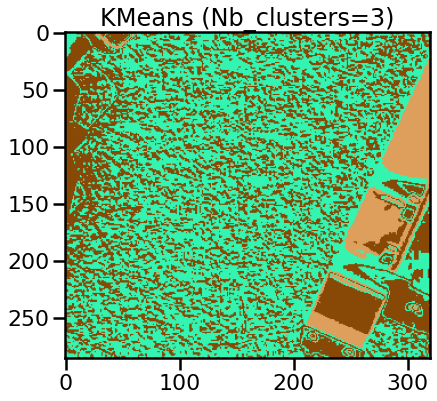

In [21]:
from sklearn.cluster import KMeans

n_clusters_ = 3
kmeans = KMeans(n_clusters=n_clusters_, max_iter=200).fit(X)
plot_clustered_image(X_rgb, kmeans.labels_, title=f"KMeans (Nb_clusters={n_clusters_})")

In [22]:
# from sklearn.cluster import AgglomerativeClustering
# n_clusters_ = 100
# linkage_ = 'ward'
# hierarchical = AgglomerativeClustering(n_clusters=n_clusters_, affinity='euclidean', linkage=linkage_).fit(X)
# plot_clustered_image(X_rgb, hierarchical.labels_, title=f"Hierarchical (Nb_clusters={n_clusters_}, Linkage={linkage_})")

Number of clusters: 177
Percentage of outliers: 0.22 %


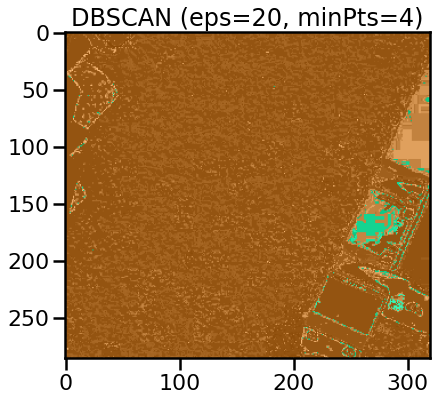

In [23]:
from sklearn.cluster import DBSCAN
eps_ = 20
min_samples_ = 4
dbscan = DBSCAN(eps=eps_, min_samples=min_samples_).fit(X)

print(f"Number of clusters: {len(np.unique(dbscan.labels_))}")
print(f"Percentage of outliers: {np.round(100 * len(np.where(dbscan.labels_==-1)[0])/len(dbscan.labels_), 2)} %" )

plot_clustered_image(X_rgb, dbscan.labels_, title=f"DBSCAN (eps={eps_}, minPts={min_samples_})")

In [24]:
!pip install hdbscan

In [25]:
import hdbscan

Number of clusters: 161
Percentage of outliers: 12.55 %


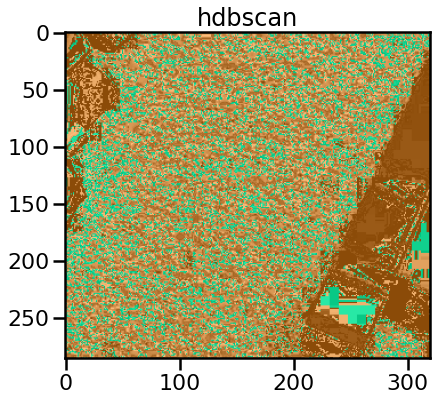

In [26]:
hdbscan = hdbscan.HDBSCAN(algorithm="best", min_cluster_size=100).fit(X)

print(f"Number of clusters: {len(np.unique(hdbscan.labels_))}")
print(f"Percentage of outliers: {np.round(100 * len(np.where(hdbscan.labels_==-1)[0])/len(hdbscan.labels_), 2)} %" )

plot_clustered_image(X_rgb, hdbscan.labels_, title="hdbscan")

##### **Comments:**
KMeans seem to capture better the general structure of the image, where as DBSCAN and HDBSCAN struggle to unify the (brown) background of the image. This is understandable because in Kmeans we specify the "visually correct" number of clusters. In DBSCAN and HDBSCAN, we don't give the number of clusters but we give abstract parameters that may give the correct number of clusters. This is more generalizable that KMeans because DBSCAN and HDBSCAN can find the number of clusters (in other images) without human intervention. 
We didn't succeed to run the standard hierarchical clustering because of memory issues. 

### Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

Get a simplified 10-colored version of the following image by applying k-means. Plot both images.

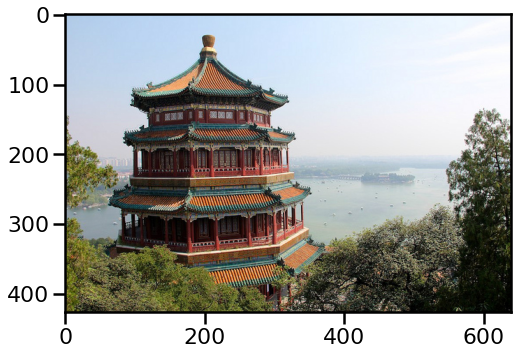

In [27]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

In [28]:
from sklearn.cluster import KMeans

X_rgb_china = np.array(china)
X_china = np.reshape(X_rgb_china, (X_rgb_china.shape[0] * X_rgb_china.shape[1], X_rgb_china.shape[2]))
kmeans = KMeans(n_clusters=10, max_iter=200).fit(X_china)

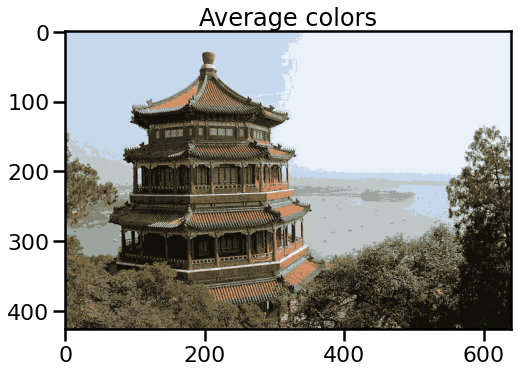

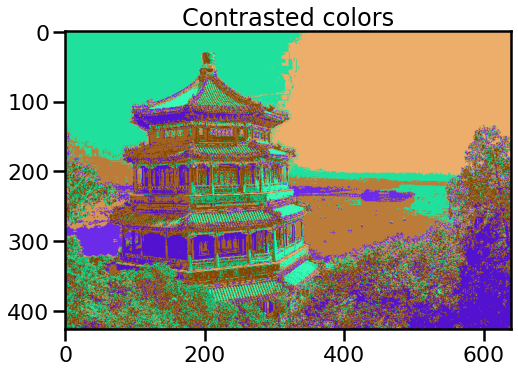

In [29]:
plot_clustered_image_bis(X_rgb_china, kmeans.labels_, title="Average colors")
plot_clustered_image(X_rgb_china, kmeans.labels_, title="Contrasted colors")